## Part 1: Correlation, regression

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 1. Load data
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
from sklearn.model_selection import train_test_split

In [6]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.2, random_state=42)

In [14]:
# 2. Fit a logistic regression and measure the accuracy on the test set.
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs',
                              multi_class='multinomial').fit(X_train, y_train)
clf.score(X_test, y_test)

/home/junxiong/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8107255520504731

In [19]:
# 3. Compute the correlation matrix
histogram_intersection = lambda a, b: np.minimum(a, b).sum().round(decimals=1)
corr = df.corr(method=histogram_intersection)
corr

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.0,180.8,562.5,444.9,573.1,256.8,573.1,573.1,573.1,549.6,476.2,573.1,442.7,116.5,571.0,556.5,163.8,565.0,561.8,407.4
sd,180.8,1.0,179.8,167.4,180.9,172.8,181.0,181.0,181.0,181.0,152.3,180.8,180.7,103.5,181.0,174.0,85.1,175.6,174.6,173.3
median,562.5,179.8,1.0,445.0,588.0,256.1,588.0,588.0,588.0,563.1,492.6,562.5,443.7,116.4,585.1,570.3,164.5,579.2,575.9,409.7
Q25,444.9,167.4,445.0,1.0,445.0,223.1,445.0,445.0,445.0,428.0,409.6,444.9,409.5,115.1,445.0,440.3,159.3,442.9,440.2,346.3
Q75,573.1,180.9,588.0,445.0,1.0,267.1,712.0,712.1,712.1,676.8,520.2,573.1,451.9,116.6,701.1,676.0,165.7,698.0,693.8,453.3
IQR,256.8,172.8,256.1,223.1,267.1,1.0,267.1,267.1,267.1,266.9,213.3,256.8,252.8,103.7,267.1,250.7,94.5,256.3,255.4,240.1
skew,573.1,181.0,588.0,445.0,712.0,267.1,1.0,9948.1,2825.4,1290.8,523.6,573.1,452.4,116.6,819.9,2559.2,166.8,5586.6,5541.5,550.3
kurt,573.1,181.0,588.0,445.0,712.1,267.1,9948.1,1.0,2835.8,1293.2,523.6,573.1,452.4,116.6,820.0,2626.9,166.8,13584.5,13456.3,550.4
sp.ent,573.1,181.0,588.0,445.0,712.1,267.1,2825.4,2835.8,1.0,1293.2,523.6,573.1,452.4,116.6,820.0,2018.1,166.8,2595.4,2560.9,550.4
sfm,549.6,181.0,563.1,428.0,676.8,266.9,1290.8,1293.2,1293.2,1.0,497.6,549.6,443.5,116.6,761.5,1027.0,161.5,1219.9,1210.8,518.8


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from string import ascii_letters

In [24]:
sns.set(style="white")

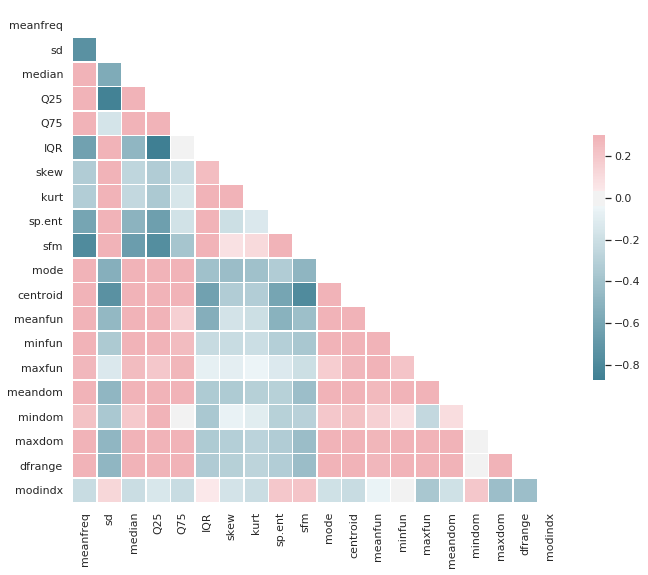

In [26]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
# 4 Features Choice
# Remove the strongest correlated features

In [28]:
df = df.drop(['meanfreq', 'Q25', 'centroid'], axis=1)
df.head()

,sd,median,Q75,IQR,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.064241,0.032027,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.067310,0.040229,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.083829,0.036718,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.072111,0.158011,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.079146,0.124656,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [29]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.2, random_state=42)
# 2. Fit a logistic regression and measure the accuracy on the test set.
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs',
                              multi_class='multinomial').fit(X_train, y_train)
clf.score(X_test, y_test)

/home/junxiong/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8217665615141956

## Part 2

In [31]:
# 1. Load data
df = pd.read_csv('horse.csv')
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
surgery                  299 non-null object
age                      299 non-null object
hospital_number          299 non-null int64
rectal_temp              239 non-null float64
pulse                    275 non-null float64
respiratory_rate         241 non-null float64
temp_of_extremities      243 non-null object
peripheral_pulse         230 non-null object
mucous_membrane          252 non-null object
capillary_refill_time    267 non-null object
pain                     244 non-null object
peristalsis              255 non-null object
abdominal_distention     243 non-null object
nasogastric_tube         195 non-null object
nasogastric_reflux       193 non-null object
nasogastric_reflux_ph    53 non-null float64
rectal_exam_feces        197 non-null object
abdomen                  181 non-null object
packed_cell_volume       270 non-null float64
total_protein            266 non-null

In [60]:
# 3. Fill in the missing values 
X, y = df.iloc[:, :-1], df['cp_data']
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,outcome,surgical_lesion
0,no,adult,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,decreased,distend_large,NaN,died,no
1,yes,adult,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,absent,other,cloudy,euthanized,no
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,normal,normal,NaN,lived,no
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,NaN,serosanguious,died,yes
4,no,adult,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,died,no


In [61]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
df_categorical = pd.DataFrame(imp.fit_transform(df_categorical))
df_categorical.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,no,adult,cool,reduced,normal_pink,more_3_sec,extreme_pain,absent,severe,slight,none,decreased,distend_large,cloudy,died,no
1,yes,adult,cool,normal,pale_cyanotic,less_3_sec,mild_pain,absent,slight,slight,none,absent,other,cloudy,euthanized,no
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,normal,normal,cloudy,lived,no
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,distend_large,serosanguious,died,yes
4,no,adult,cool,normal,dark_cyanotic,more_3_sec,mild_pain,hypomotile,none,slight,none,absent,distend_large,cloudy,died,no


In [62]:
df_categorical = pd.get_dummies(df_categorical)
df_categorical.head()

,0_no,0_yes,1_adult,1_young,2_cold,2_cool,2_normal,2_warm,3_absent,3_increased,...,12_normal,12_other,13_clear,13_cloudy,13_serosanguious,14_died,14_euthanized,14_lived,15_no,15_yes
0,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,0,1,1,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,1,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,1,0
3,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
4,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [63]:
df_numeric = X.select_dtypes(include=['float64'])
df_numeric.head()

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein
0,38.5,66.0,28.0,NaN,45.0,8.4,NaN
1,39.2,88.0,20.0,NaN,50.0,85.0,2.0
2,38.3,40.0,24.0,NaN,33.0,6.7,NaN
3,39.1,164.0,84.0,5.0,48.0,7.2,5.3
4,37.3,104.0,35.0,NaN,74.0,7.4,NaN


In [67]:
# fill in the missing values in numerical features
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df_numeric)
df_numeric = pd.DataFrame(imp.transform(df_numeric))
df_numeric.head()

,0,1,2,3,4,5,6
0,38.5,66.0,28.0,4.707547,45.0,8.4,3.039604
1,39.2,88.0,20.0,4.707547,50.0,85.0,2.000000
2,38.3,40.0,24.0,4.707547,33.0,6.7,3.039604
3,39.1,164.0,84.0,5.000000,48.0,7.2,5.300000
4,37.3,104.0,35.0,4.707547,74.0,7.4,3.039604


In [69]:
# Encode the label
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)
y = pd.DataFrame(le.transform(y)) 
y.head()

,0
0,0
1,0
2,1
3,1
4,0


In [80]:
# 4. Fit Decision Tree
# Generate Training and test set
X = np.concatenate((df_categorical, df_numeric), axis=1)
y = y.values
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.2, random_state=42)

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8

In [93]:
# 5. Fit random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=0)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.7666666666666667

## Project 3. Project Banking domain 

In [94]:
df = pd.read_csv('loan_borowwer_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [98]:
X, y = df.iloc[:, :-1], df['not.fully.paid']
df_categorical = pd.get_dummies(X.select_dtypes(include=['object']))
df_numeric = X.select_dtypes(include=['float64'])
X = np.concatenate((df_categorical.values, df_numeric.values), axis=1)
y = y.values

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=0)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8408141962421712